**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Importing Datasets**

In [2]:
from google.colab import files
dataset = files.upload()

Saving airline-passengers.csv to airline-passengers.csv
Saving D1.csv to D1.csv
Saving D2.csv to D2.csv
Saving D3.csv to D3.csv


**Reading Datasets**

In [4]:
done = pd.read_csv('/content/D1.csv')
dtwo = pd.read_csv('/content/D2.csv')
dthree = pd.read_csv('/content/D3.csv',index_col='Month',parse_dates=True)

# D1

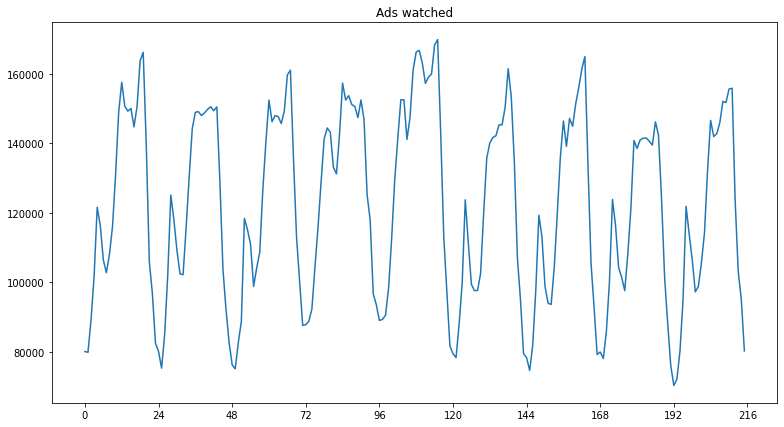

In [13]:
plt.figure(figsize=(13,7))
plt.plot(done['Ads'])
plt.title('Ads watched')
plt.xticks([i for i in range(0,220,24)])
plt.show()

kpss test

In [22]:


def kpsstest1(col):

    timeseries = done[col].dropna()
    print ('Results of KPSS Test for ',col)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [32]:
kpsstest1('Ads')

Results of KPSS Test for  Ads
Test Statistic            0.085159
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


adf test

In [33]:
def adftest1(col):
  
    timeseries = done[col].dropna()
    print ('Results of Dickey-Fuller Test for ',col,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [34]:
adftest1('Ads')

Results of Dickey-Fuller Test for  Ads 

Test Statistic                -7.089634e+00
p-value                        4.444804e-10
#Lags Used                     9.000000e+00
Number of Observations Used    2.060000e+02
Critical Value (1%)           -3.462499e+00
Critical Value (5%)           -2.875675e+00
Critical Value (10%)          -2.574304e+00
dtype: float64


In [ ]:
#series is stationary

single exponential smoothing

In [48]:
def single_expo(dataset,alpha):
    res = np.zeros_like(dataset)
    
    res[0] = dataset[0]
    for i in range(1,dataset.shape[0]):
        res[i] = alpha*dataset[i] + (1-alpha)*res[i-1]
        
    return res


def plot_single_expo(dataset, alphas):
    """Plots exponential smoothing with different alphas."""  
    plt.figure(figsize=(13, 7))
    for alpha in alphas:
        plt.plot(single_expo(done['Ads'], alpha), label='Alpha-> {}'.format(alpha))

    plt.plot(dataset, label='Original')
    plt.legend(loc='best')
  
    plt.title('Single Exponential Smoothing')


In [118]:
k1 = single_expo(done['Ads'],0.5)
k2 = single_expo(done['Ads'],0.6)
k3 = single_expo(done['Ads'],0.2)
k4 = single_expo(done['Ads'],0.05)
mse1 = mse(done['Ads'],k1)
mse2 = mse(done['Ads'],k2)
mse3 = mse(done['Ads'],k3)
mse4 = mse(done['Ads'],k4)
print(mse1,mse2,mse3,mse4)
print(min(mse1,mse2,mse3,mse4))


73665596.59722222 39366185.09259259 370760028.0046296 724280649.3287038
39366185.09259259


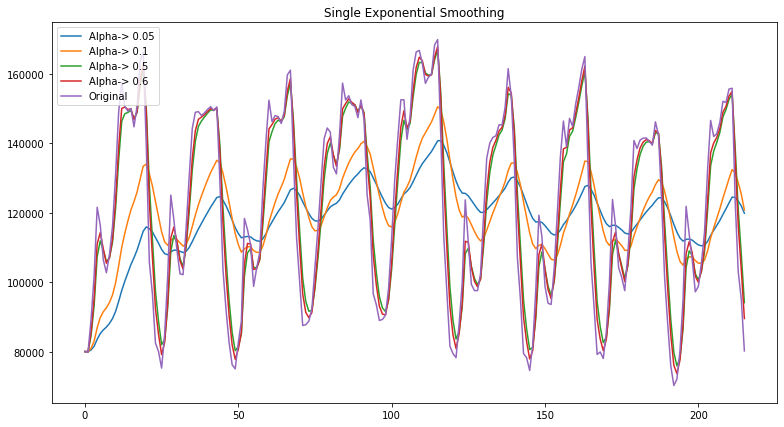

In [49]:
plot_single_expo(done['Ads'].values, [0.05,0.1,0.5,0.6])

double exponential smoothing

In [68]:
def double_expo(dataset, alpha, gamma, npred=2):
    
    length = dataset.shape[0]
    results = np.zeros(length + npred)

    
    S = dataset[0]
    results[0] = dataset[0]
    b = dataset[1] - dataset[0]
    for t in range(1, length + 1):
        if t >= length:
            
            value = results[t - 1]
        else:
            value = dataset[t]

        St_1 = S
        S = alpha * value + (1 - alpha) * (S + b)
        b = gamma * (S - St_1) + (1 - gamma) * b
        results[t] = S + b

    
    if npred > 1:
        results[length + 1:] = S + np.arange(2, npred + 1) * b

    return results

In [129]:
k1 = double_expo(done['Ads'],0.5,0.5)
k2 = double_expo(done['Ads'],0.6,0.9)
k3 = double_expo(done['Ads'],0.9,0.9)
k4 = double_expo(done['Ads'],0.1,0.9)
mse1 = mse(done['Ads'],k1[:-2])
mse2 = mse(done['Ads'],k2[:-2])
mse3 = mse(done['Ads'],k3[:-2])
mse4 = mse(done['Ads'],k4[:-2])
print(mse1,mse2,mse3,mse4)
print(min(mse1,mse2,mse3,mse4))


116318102.00116864 131957076.75249492 119859673.51726925 1634888957.499707
116318102.00116864


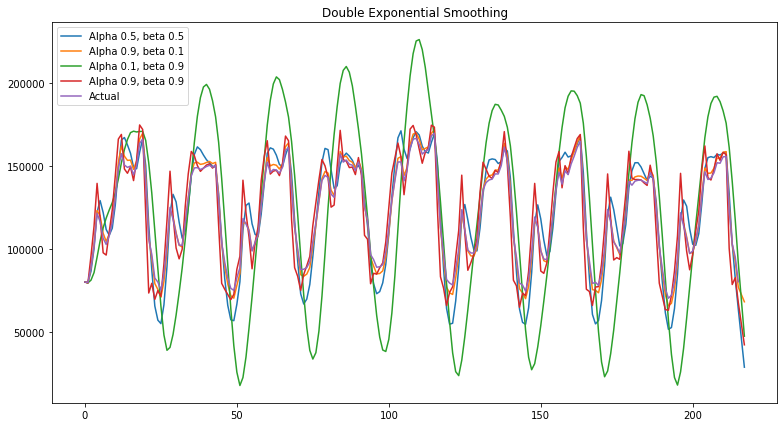

In [62]:
def plot_double_expo(dataset, alphas, gammas):
    
    plt.figure(figsize=(13, 7))
    for alpha, gamma in zip(alphas, gammas):
        results = double_expo(done['Ads'], alpha, gamma)
        plt.plot(results, label='Alpha {}, beta {}'.format(alpha,gamma))

    plt.plot(done['Ads'].values, label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Double Exponential Smoothing')
   

plot_double_expo(done['Ads'].values, alphas=[0.5,0.9, 0.1,0.9], gammas=[0.5,0.1, 0.9,0.9])

triple exponential smoothing

In [96]:
class triple:
  
    def __init__(self, season_len=24, alpha=0.5, beta=0.5, gamma=0.5):
        self.beta = beta
        self.alpha = alpha
        self.gamma = gamma
        self.season_len = season_len

    def fit(self, series):
       
        beta = self.beta
        alpha = self.alpha
        gamma = self.gamma
        season_len = self.season_len
        seasonals = self._initial_seasonal(series)

       
        predictions = []
        smooth = series[0]
        trend = self._initial_trend(series)
        predictions.append(smooth)

        for i in range(1, len(series)):
            value = series[i]
            previous_smooth = smooth
            seasonal = seasonals[i % season_len]
            smooth = alpha * (value - seasonal) + (1 - alpha) * (previous_smooth + trend)
            trend = gamma * (smooth - previous_smooth) + (1 - gamma) * trend
            seasonals[i % season_len] = beta * (value - smooth) + (1 - beta) * seasonal
            predictions.append(smooth + trend + seasonals[i % season_len])

        self.trend_ = trend
        self.smooth_ = smooth
        self.seasonals_ = seasonals
        self.predictions_ = predictions
        return self
    
    def _initial_trend(self, series):
        season_len = self.season_len
        total = 0.0
        for i in range(season_len):
            total += (series[i + season_len] - series[i]) / season_len

        trend = total / season_len
        return trend

    def _initial_seasonal(self, series):
        season_len = self.season_len
        n_seasons = len(series) // season_len

        season_averages = np.zeros(n_seasons)
        for j in range(n_seasons):
            start_index = season_len * j
            end_index = start_index + season_len
            season_average = np.sum(series[start_index:end_index]) / season_len
            season_averages[j] = season_average

        seasonals = np.zeros(season_len)
        seasons = np.arange(n_seasons)
        index = seasons * season_len
        for i in range(season_len):
            seasonal = np.sum(series[index + i] - season_averages) / n_seasons
            seasonals[i] = seasonal

        return seasonals

    def predict(self, n_preds=10):
       
        predictions = self.predictions_
        original_series_len = len(predictions)
        for i in range(original_series_len, original_series_len + n_preds):
            m = i - original_series_len + 1
            prediction = self.smooth_ + m * self.trend_ + self.seasonals_[i % self.season_len]
            predictions.append(prediction)

        return predictions

In [97]:
def cv_score(params, series, loss_function, season_len=24, n_splits=3):
    
    errors = []    
    alpha, beta, gamma = params
    time_series_split = TimeSeriesSplit(n_splits=n_splits) 

    for train, test in time_series_split.split(done['Ads']):
        model = triple(season_len, alpha, beta, gamma)
        model.fit(done['Ads'][train])

        predictions = model.predict(n_preds=len(test))
        test_predictions = predictions[-len(test):]
        test_actual = done['Ads'][test]
        error = loss_function(test_actual, test_predictions)
        errors.append(error)

    return np.mean(errors)

In [100]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import TimeSeriesSplit
x = [0.6, 0.2, 0.1]
test_size = 20
data = done['Ads'].values[:-test_size]
opt = minimize(cv_score, x0=x, 
               args=(data, mean_squared_log_error), 
               method='TNC', bounds=((0.01, 0.99), (0.01, 0.99), (0.01, 0.99)))

print('original parameters: {}'.format(str(x)))
print('best parameters: {}'.format(str(opt.x)))

original parameters: [0.6, 0.2, 0.1]
best parameters: [0.99 0.01 0.01]


# D2

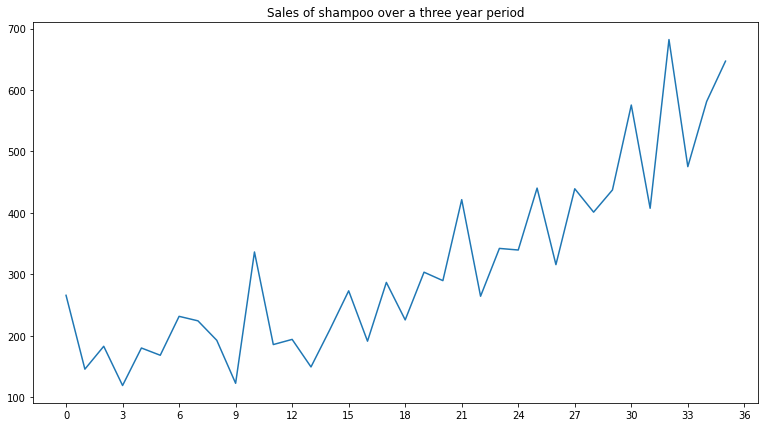

In [16]:
plt.figure(figsize=(13,7))
plt.plot(dtwo['Sales of shampoo over a three year period'])
plt.title('Sales of shampoo over a three year period')
plt.xticks([i for i in range(0,39,3)])
plt.show()

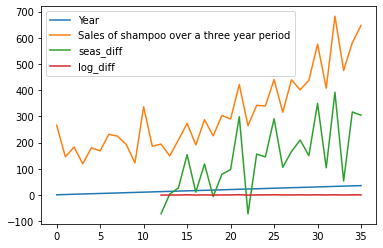

In [86]:
dtwo['seas_diff'] = dtwo['Sales of shampoo over a three year period'].diff(periods=12)
dataset_log = np.log(dtwo['Sales of shampoo over a three year period'])
dtwo['log_diff'] = dataset_log.diff(periods=12)
dtwo.plot()

kpss test

In [36]:
def kpsstest2(col):

    timeseries = dtwo[col].dropna()
    print ('Results of KPSS Test for ',col)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [37]:
kpsstest2('Sales of shampoo over a three year period')

Results of KPSS Test for  Sales of shampoo over a three year period
Test Statistic            0.439388
p-value                   0.060178
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


adf test

In [38]:
def adftest2(col):
    #Perform Dickey-Fuller test:
    timeseries = dtwo[col].dropna()
    print ('Results of Dickey-Fuller Test for ',col,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [39]:
adftest2('Sales of shampoo over a three year period')

Results of Dickey-Fuller Test for  Sales of shampoo over a three year period 

Test Statistic                  3.060142
p-value                         1.000000
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [ ]:
# trend stationary series

single exponential smoothing


In [50]:
def plot_single_expo(dataset, alphas):
    """Plots exponential smoothing with different alphas."""  
    plt.figure(figsize=(13, 7))
    for alpha in alphas:
        plt.plot(single_expo(dtwo['Sales of shampoo over a three year period'], alpha), label='Alpha-> {}'.format(alpha))

    plt.plot(dataset, label='Original')
    plt.legend(loc='best')
    #plt.axis('tight')
    plt.title('Single Exponential Smoothing')

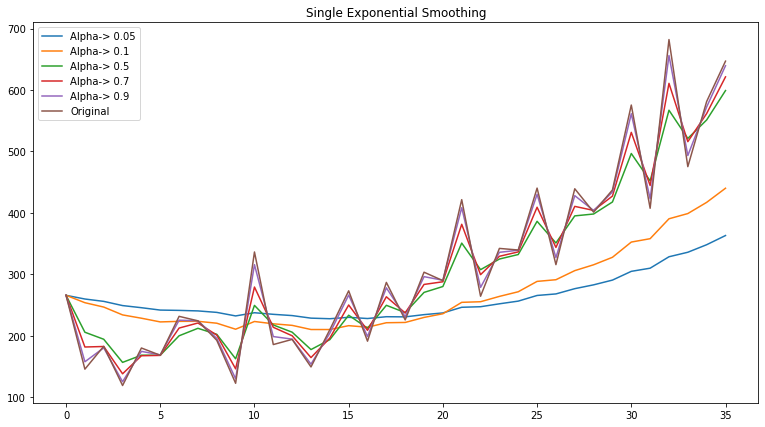

In [53]:
plot_single_expo(dtwo['Sales of shampoo over a three year period'],alphas=[0.05,0.1,0.5,0.7,0.9])

In [119]:
k1 = single_expo(dtwo['Sales of shampoo over a three year period'],0.5)
k2 = single_expo(dtwo['Sales of shampoo over a three year period'],0.6)
k3 = single_expo(dtwo['Sales of shampoo over a three year period'],0.7)
k4 = single_expo(dtwo['Sales of shampoo over a three year period'],0.05)
mse1 = mse(dtwo['Sales of shampoo over a three year period'],k1)
mse2 = mse(dtwo['Sales of shampoo over a three year period'],k2)
mse3 = mse(dtwo['Sales of shampoo over a three year period'],k3)
mse4 = mse(dtwo['Sales of shampoo over a three year period'],k4)
print(mse1,mse2,mse3,mse4)
print(min(mse1,mse2,mse3,mse4))

1750.311433026734 1184.6682697391273 722.9125148044105 16550.339085675998
722.9125148044105


double exponential smoothing

In [130]:
k1 = double_expo(dtwo['Sales of shampoo over a three year period'],0.5,0.5)
k2 = double_expo(dtwo['Sales of shampoo over a three year period'],0.6,0.2)
k3 = double_expo(dtwo['Sales of shampoo over a three year period'],0.7,0.3)
k4 = double_expo(dtwo['Sales of shampoo over a three year period'],0.01,0.9)
mse1 = mse(dtwo['Sales of shampoo over a three year period'],k1[:-2])
mse2 = mse(dtwo['Sales of shampoo over a three year period'],k2[:-2])
mse3 = mse(dtwo['Sales of shampoo over a three year period'],k3[:-2])
mse4 = mse(dtwo['Sales of shampoo over a three year period'],k4[:-2])
print(mse1,mse2,mse3,mse4)
print(min(mse1,mse2,mse3,mse4))

3023.2703758772955 3766.809663581089 1941.197362167521 723323.0219735969
1941.197362167521


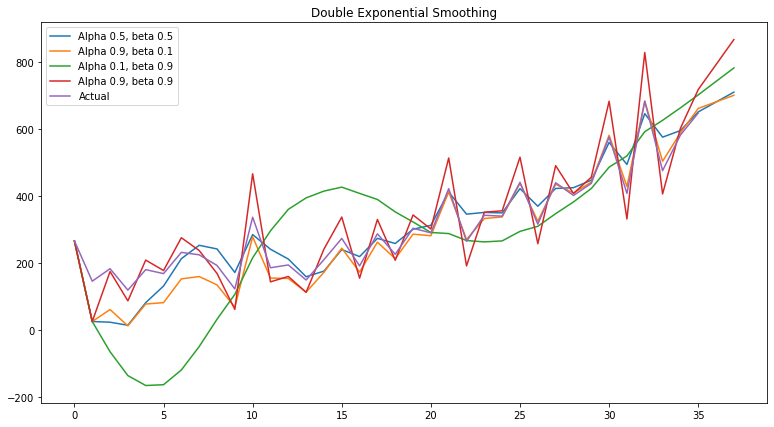

In [75]:
def plot_double_expo(dataset, alphas, gammas):
    
    plt.figure(figsize=(13, 7))
    for alpha, gamma in zip(alphas, gammas):
        results = double_expo(dtwo['Sales of shampoo over a three year period'], alpha, gamma)
        plt.plot(results, label='Alpha {}, beta {}'.format(alpha,gamma))

    plt.plot(dtwo['Sales of shampoo over a three year period'].values, label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Double Exponential Smoothing')
   

plot_double_expo(dtwo['Sales of shampoo over a three year period'].values, alphas=[0.5,0.9, 0.1,0.9], gammas=[0.5,0.1, 0.9,0.9])

triple exponential smoothing

-14.1

In [ ]:
class triple:
  
    def __init__(self, season_len=3, alpha=0.5, beta=0.5, gamma=0.5):
        self.beta = beta
        self.alpha = alpha
        self.gamma = gamma
        self.season_len = season_len

    def fit(self, series):
       
        beta = self.beta
        alpha = self.alpha
        gamma = self.gamma
        season_len = self.season_len
        seasonals = self._initial_seasonal(series)

       
        predictions = []
        smooth = series[0]
        trend = self._initial_trend(series)
        predictions.append(smooth)

        for i in range(1, len(series)):
            value = series[i]
            previous_smooth = smooth
            seasonal = seasonals[i % season_len]
            smooth = alpha * (value - seasonal) + (1 - alpha) * (previous_smooth + trend)
            trend = gamma * (smooth - previous_smooth) + (1 - gamma) * trend
            seasonals[i % season_len] = beta * (value - smooth) + (1 - beta) * seasonal
            predictions.append(smooth + trend + seasonals[i % season_len])

        self.trend_ = trend
        self.smooth_ = smooth
        self.seasonals_ = seasonals
        self.predictions_ = predictions
        return self
    
    def _initial_trend(self, series):
        season_len = self.season_len
        total = 0.0
        for i in range(season_len):
            total += (series[i + season_len] - series[i]) / season_len

        trend = total / season_len
        return trend

    def _initial_seasonal(self, series):
        season_len = self.season_len
        n_seasons = len(series) // season_len

        season_averages = np.zeros(n_seasons)
        for j in range(n_seasons):
            start_index = season_len * j
            end_index = start_index + season_len
            season_average = np.sum(series[start_index:end_index]) / season_len
            season_averages[j] = season_average

        seasonals = np.zeros(season_len)
        seasons = np.arange(n_seasons)
        index = seasons * season_len
        for i in range(season_len):
            seasonal = np.sum(series[index + i] - season_averages) / n_seasons
            seasonals[i] = seasonal

        return seasonals

    def predict(self, n_preds=10):
       
        predictions = self.predictions
        original_series_len = len(predictions)
        for i in range(original_series_len, original_series_len + n_preds):
            m = i - original_series_len + 1
            prediction = self.smooth_ + m * self.trend_ + self.seasonals_[i % self.season_len]
            predictions.append(prediction)

        return predictions

In [102]:
def cv_score(params, series, loss_function, season_len=3, n_splits=3):
    
    errors = []    
    alpha, beta, gamma = params
    time_series_split = TimeSeriesSplit(n_splits=n_splits) 

    for train, test in time_series_split.split(dtwo['Sales of shampoo over a three year period']):
        model = triple(season_len, alpha, beta, gamma)
        model.fit(dtwo['Sales of shampoo over a three year period'][train])

        predictions = model.predict(n_preds=len(test))
        test_predictions = predictions[-len(test):]
        test_actual = dtwo['Sales of shampoo over a three year period'][test]
        error = loss_function(test_actual, test_predictions)
        errors.append(error)

    return np.mean(errors)

In [107]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import TimeSeriesSplit
x = [0.5, 0.2, 0.1]
test_size = 10
data = dtwo['Sales of shampoo over a three year period'].values[:-test_size]
opt = minimize(cv_score, x0=x, 
               args=(data, mse), 
               method='TNC', bounds=((0.01, 0.99), (0.01, 0.99), (0.01, 0.99)))

print('original parameters: {}'.format(str(x)))
print('best parameters: {}'.format(str(opt.x)))

original parameters: [0.5, 0.2, 0.1]
best parameters: [0.12816288 0.01       0.86214357]


# D3

In [165]:
plt.figure(figsize=(13,7))
plt.plot(dthree['Passengers'])
plt.title('Passengers')
plt.xticks([i for i in range(0,148,12)])
plt.show()

KeyError: ignored

<Figure size 936x504 with 0 Axes>

kpss test

In [41]:
def kpsstest3(col):

    timeseries = dthree[col].dropna()
    print ('Results of KPSS Test for ',col)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [42]:
kpsstest3('Passengers')

Results of KPSS Test for  Passengers
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


adf test

In [40]:
def adftest3(col):
    #Perform Dickey-Fuller test:
    timeseries = dthree[col].dropna()
    print ('Results of Dickey-Fuller Test for ',col,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [43]:
adftest3('Passengers')

Results of Dickey-Fuller Test for  Passengers 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
#non-stationary

single exponential smoothing

In [54]:
def plot_single_expo(dataset, alphas):
    """Plots exponential smoothing with different alphas."""  
    plt.figure(figsize=(13, 7))
    for alpha in alphas:
        plt.plot(single_expo(dthree['Passengers'], alpha), label='Alpha-> {}'.format(alpha))

    plt.plot(dataset, label='Original')
    plt.legend(loc='best')
   
    plt.title('Single Exponential Smoothing')

In [120]:
k1 = single_expo(dthree['Passengers'],0.5)
k2 = single_expo(dthree['Passengers'],0.6)
k3 = single_expo(dthree['Passengers'],0.7)
k4 = single_expo(dthree['Passengers'],0.05)
mse1 = mse(dthree['Passengers'],k1)
mse2 = mse(dthree['Passengers'],k2)
mse3 = mse(dthree['Passengers'],k3)
mse4 = mse(dthree['Passengers'],k4)
print(mse1,mse2,mse3,mse4)
print(min(mse1,mse2,mse3,mse4))

436.55555555555554 253.15277777777777 129.66666666666666 4732.631944444444
129.66666666666666


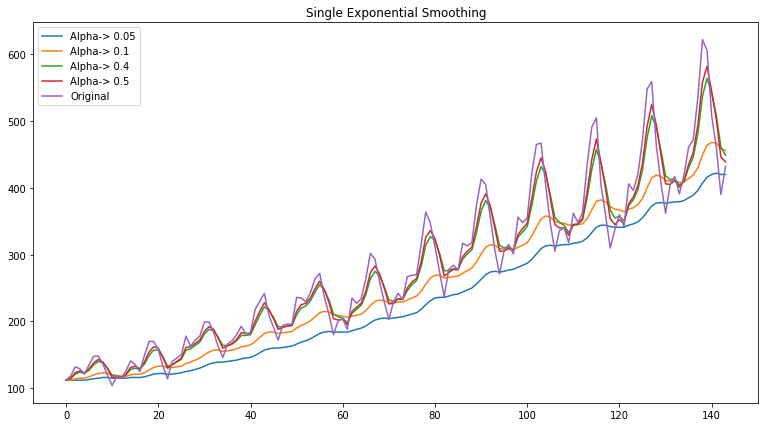

In [55]:
plot_single_expo(dthree['Passengers'],[0.05,0.1,0.4,0.5])

double exponential smoothing

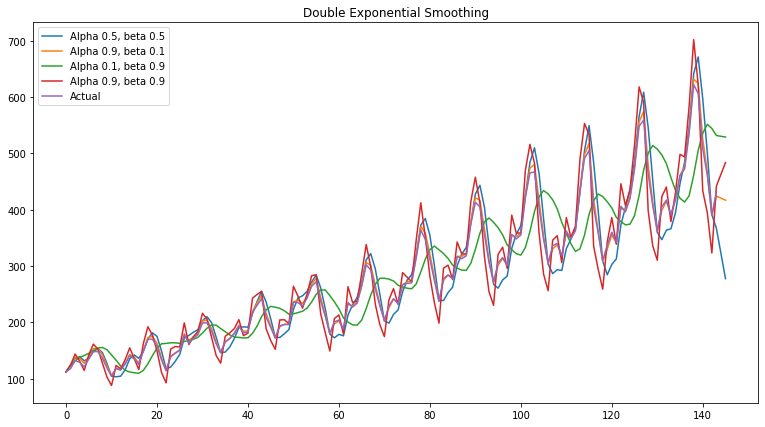

In [76]:
def plot_double_expo(dataset, alphas, gammas):
    
    plt.figure(figsize=(13, 7))
    for alpha, gamma in zip(alphas, gammas):
        results = double_expo(dthree['Passengers'], alpha, gamma)
        plt.plot(results, label='Alpha {}, beta {}'.format(alpha,gamma))

    plt.plot(dthree['Passengers'].values, label='Actual')
    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Double Exponential Smoothing')
   

plot_double_expo(dthree['Passengers'].values, alphas=[0.5,0.9, 0.1,0.9], gammas=[0.5,0.1, 0.9,0.9])

triple exponential smoothing

1.0833333333333333

In [ ]:
class triple:
  
    def __init__(self, season_len=12, alpha=0.5, beta=0.5, gamma=0.5):
        self.beta = beta
        self.alpha = alpha
        self.gamma = gamma
        self.season_len = season_len

    def fit(self, series):
       
        beta = self.beta
        alpha = self.alpha
        gamma = self.gamma
        season_len = self.season_len
        seasonals = self._initial_seasonal(series)

        # initial values
        predictions = []
        smooth = series[0]
        trend = self._initial_trend(series)
        predictions.append(smooth)

        for i in range(1, len(series)):
            value = series[i]
            previous_smooth = smooth
            seasonal = seasonals[i % season_len]
            smooth = alpha * (value - seasonal) + (1 - alpha) * (previous_smooth + trend)
            trend = gamma * (smooth - previous_smooth) + (1 - gamma) * trend
            seasonals[i % season_len] = beta * (value - smooth) + (1 - beta) * seasonal
            predictions.append(smooth + trend + seasonals[i % season_len])

        self.trend_ = trend
        self.smooth_ = smooth
        self.seasonals_ = seasonals
        self.predictions_ = predictions
        return self
    
    def _initial_trend(self, series):
        season_len = self.season_len
        total = 0.0
        for i in range(season_len):
            total += (series[i + season_len] - series[i]) / season_len

        trend = total / season_len
        return trend

    def _initial_seasonal(self, series):
        season_len = self.season_len
        n_seasons = len(series) // season_len

        season_averages = np.zeros(n_seasons)
        for j in range(n_seasons):
            start_index = season_len * j
            end_index = start_index + season_len
            season_average = np.sum(series[start_index:end_index]) / season_len
            season_averages[j] = season_average

        seasonals = np.zeros(season_len)
        seasons = np.arange(n_seasons)
        index = seasons * season_len
        for i in range(season_len):
            seasonal = np.sum(series[index + i] - season_averages) / n_seasons
            seasonals[i] = seasonal

        return seasonals

    def predict(self, n_preds=10):
       
        predictions = self.predictions_
        original_series_len = len(predictions)
        for i in range(original_series_len, original_series_len + n_preds):
            m = i - original_series_len + 1
            prediction = self.smooth_ + m * self.trend_ + self.seasonals_[i % self.season_len]
            predictions.append(prediction)

        return predictions

In [108]:
def cv_score(params, series, loss_function, season_len=12, n_splits=3):
    
    errors = []    
    alpha, beta, gamma = params
    time_series_split = TimeSeriesSplit(n_splits=n_splits) 

    for train, test in time_series_split.split(dthree['Passengers']):
        model = triple(season_len, alpha, beta, gamma)
        model.fit(dthree['Passengers'][train])

        predictions = model.predict(n_preds=len(test))
        test_predictions = predictions[-len(test):]
        test_actual = dthree['Passengers'][test]
        error = loss_function(test_actual, test_predictions)
        errors.append(error)

    return np.mean(errors)

In [110]:

x = [0.5, 0.2, 0.1]
test_size = 20
data = dthree['Passengers'].values[:-test_size]
opt = minimize(cv_score, x0=x, 
               args=(data, mse), 
               method='TNC', bounds=((0.01, 0.99), (0.01, 0.99), (0.01, 0.99)))

print('original parameters: {}'.format(str(x)))
print('best parameters: {}'.format(str(opt.x)))

original parameters: [0.5, 0.2, 0.1]
best parameters: [0.18578041 0.78484461 0.17316203]


seasonality index

In [139]:
def _initial_seasonal(series,season_len):
        
        n_seasons = len(series) // season_len

        season_averages = np.zeros(n_seasons)
        for j in range(n_seasons):
            start_index = season_len * j
            end_index = start_index + season_len
            season_average = np.sum(series[start_index:end_index]) / season_len
            season_averages[j] = season_average

        seasonals = np.zeros(season_len)
        seasons = np.arange(n_seasons)
        index = seasons * season_len
        for i in range(season_len):
            seasonal = np.sum(series[index + i] - season_averages) / n_seasons
            seasonals[i] = seasonal

        return seasonals

In [140]:
_initial_seasonal(series = dthree['Passengers'],season_len=12)

array([-38.54861111, -45.29861111, -10.13194444, -13.21527778,
        -8.46527778,  31.36805556,  71.03472222,  70.78472222,
        22.11805556, -13.71527778, -47.46527778, -18.46527778])

predicting next values

In [143]:
alpha_final, beta_final, gamma_final = opt.x
model = triple(season, alpha_final, beta_final, gamma_final)
model.fit(data)
predictions = model.predict(n_preds=24)

print('original series length: ', len(dthree['Passengers']))
print('prediction length: ', len(predictions))

original series length:  144
prediction length:  148


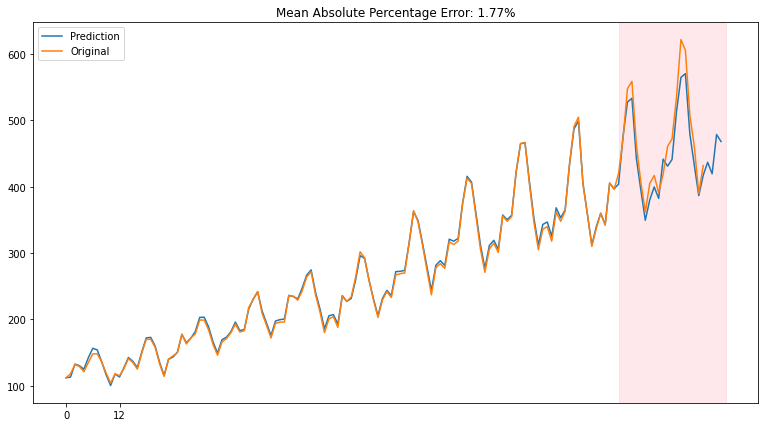

In [148]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


data = dthree['Passengers'].values
error = mean_absolute_percentage_error(data, predictions[:len(dthree['Passengers'])])

plt.figure(figsize=(13,7))
plt.plot(predictions, label='Prediction')
plt.plot(data, label='Original')
plt.title('Mean Absolute Percentage Error: {0:.2f}%'.format(error))
plt.xticks([i for i in (0,200,12)])
plt.axvspan(len(dthree['Passengers']) - test_size, len(predictions), alpha=0.3, color='lightpink')

plt.axis('tight')
plt.legend(loc='best', fontsize=10)
plt.show()

inbuilt functions

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 

from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [167]:
dthree.index.freq = "MS"
train= dthree[:100]
test = dthree[100:]

In [ ]:
fitted_model = ExponentialSmoothing(train['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train['Passengers'].plot(legend=True,label='trained')
test['Passengers'].plot(legend=True,label='tested',figsize=(13,7))
test_predictions.plot(legend=True,label='pedicted')
plt.title('holtz')